### mediapipe로 얼굴 인식하기

- 참고" https://mediapipe.dev/

1. https://mediapipe.dev/ 접속  -> Docs 클릭
2. Solutions > Face Detection 에서 Python Solution API 영상부분(For webcam input) 코드 복사 




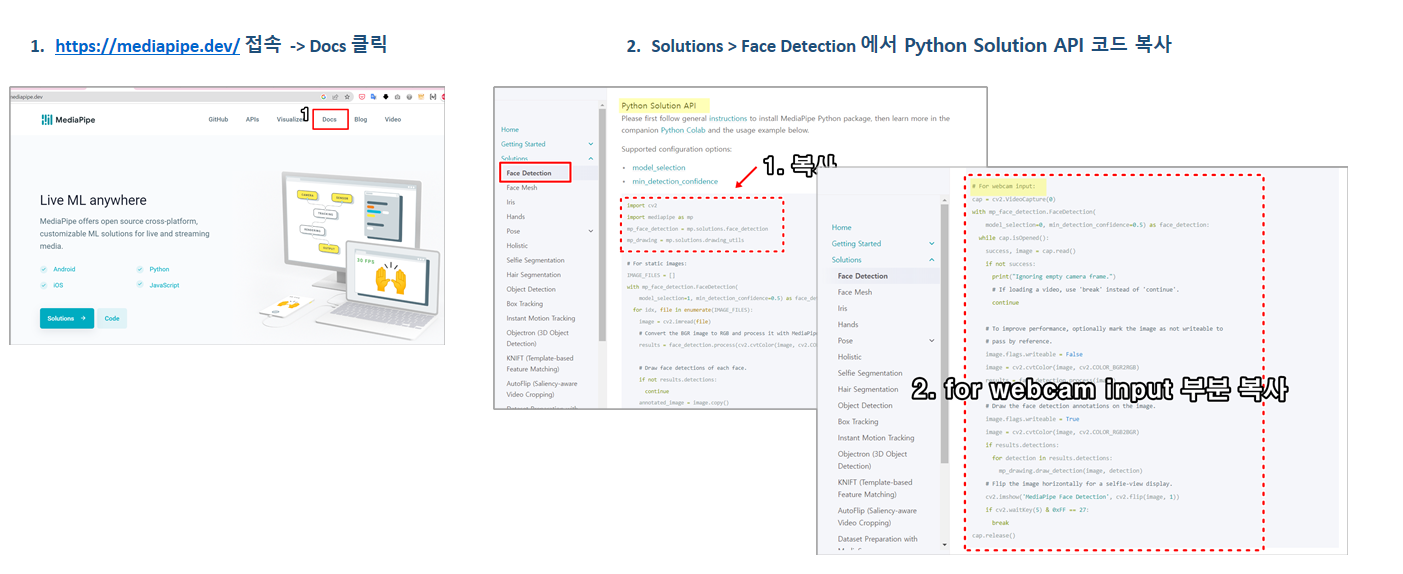

> !pip install mediapipe

In [1]:
#------------------------------------------
#  전체 코드
#------------------------------------------


import cv2
import mediapipe as mp

# 얼굴 찾고, 특징 표시
mp_face_detection = mp.solutions.face_detection #얼굴 검출
mp_drawing = mp.solutions.drawing_utils # 얼굴 특징 표시

# For webcam input:
cap = cv2.VideoCapture('./face_video.mp4')

'''
--------------------------------------------------------------------------------------------------------------
mp_face_detection.FaceDetection 옵션
* model_selection=0:모델 인덱스는 0 또는 1입니다.
                    0을 사용하면 카메라 2m 이내의 부분적 모델 촬영에 적합하고,
                    1은 5m 이내에서 전신 모델을 촬영하는데 적합합니다.
                    지정하지 않을 경우의 기본값은 0입니다.

* min_detection_confidence=0.5 :검출에 성공한 것으로 간주할 얼굴의 검출 모델의 신뢰값은([0.0, 1.0])입니다.
                                기본값은 0.5입니다.
--------------------------------------------------------------------------------------------------------------
'''

with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
      while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            # 비디오 파일의 경우 'continue'를 사용하시고, 웹캠에 경우에는 'break'를 사용하세요.
            break

        # 성능을 향상시키려면 선택적으로 이미지를 쓰기 불가능으로 표시하십시오.
        image.flags.writeable = False
        
        # 이미지를 BGR 이미지를 RGB로 변환합니다.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # --------------원본 image에서  face_detection를 진행---------
        results = face_detection.process(image)

        # 영상에 얼굴 키포인트를 표시하기 위해 image.flags.writeable = True로 설정
        image.flags.writeable = True
        # imagem 컬러 RGB-> BGR로 변환(CV2에서 영상 재생해야 함으로)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        # --------------얼굴 detections 각 키포인트 확인-----------
        if results.detections:
            for detection in results.detections:
                
                #######################################################################################################
                # detdection 정보 확인
                # - 얼굴 경계 상자(relative_bounding_box)
                # - 6개의 특징 축출(relative_keypoints): 오른쪽 눈, 왼쪽 눈, 코끝, 입 중심, 오른쪽 귀, 왼쪽 귀
                # print(detection) # 전체 detection 확인
                # print(detection.location_data.relative_bounding_box) # 얼굴 경계 박스 확인
                #
                #  (오른쪽 눈, 왼쪽 눈, 코끝, 입 중심, 오른쪽 귀, 왼쪽 귀)순서로 각 키포이터 리스트로 반환
                # print(detection.location_data.relative_keypoints) 
                #
                # print(detection.location_data.relative_keypoints)[0] # 오른쪽 눈 반환
                #
                # [참고]
                # 경계 상자는 xminand width(둘 다 [0.0, 1.0]이미지 너비로 정규화됨) 및 
                # yminand height(둘 다 [0.0, 1.0]이미지 높이로 정규화됨) 
                # 각 키 포인트는 이미지 너비와 높이로 각각 정규화되는 x및 로 구성됩니다.y[0.0, 1.0]
                #######################################################################################################
                
                #특정 위치 가져오기 (오른쪽 눈, 왼쪽 눈, 코끝 )
                keypoints=detection.location_data.relative_keypoints
                right_eye= keypoints[0] #오른쪽 눈
                left_eye=keypoints[1] #왼쪽 눈
                
                # 이미지 전체 크기를 바탕으로  실제 좌표로 반환함
                h, w, _=image.shape 
                right_eye=(int(right_eye.x*w), int(right_eye.y*h)) # 이미지 내의 실제 좌표로 변환 (가로x, 세로y)
                left_eye=((int(left_eye.x*w),int(left_eye.y*h)))
                
                # 양 눈에 동그라미 그리기
                cv2.circle(image,right_eye,20,(255,0,0),2,cv2.LINE_AA) #파란색
                cv2.circle(image,left_eye,20,(0,0,255),2,cv2.LINE_AA) #빨강색
                
                
        # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Face Detection', cv2.flip(image, 1))
        # q키를 누르면 영상 종료
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

Ignoring empty camera frame.


### (실습)mediapip에서 제공하는 코드에서 얼굴 detections 각 키포인트 확인

In [4]:
import cv2
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(
    model_selection=0, min_detection_confidence=0.5) as face_detection:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_detection.process(image)

    # Draw the face detection annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.detections:
      for detection in results.detections:
        #----------------------------------------------------------
        # 이 부분에서 detection 값을 확인함 : print(detection)
        #----------------------------------------------------------
        print(detection)

        mp_drawing.draw_detection(image, detection)
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Face Detection', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

label_id: 0
score: 0.9685885310173035
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.5020655989646912
    ymin: 0.5137465000152588
    width: 0.2734515070915222
    height: 0.36459439992904663
  }
  relative_keypoints {
    x: 0.585838794708252
    y: 0.6019172072410583
  }
  relative_keypoints {
    x: 0.7030649185180664
    y: 0.6062178015708923
  }
  relative_keypoints {
    x: 0.6467760801315308
    y: 0.6825838088989258
  }
  relative_keypoints {
    x: 0.6422796249389648
    y: 0.7636055946350098
  }
  relative_keypoints {
    x: 0.5117581486701965
    y: 0.6452202200889587
  }
  relative_keypoints {
    x: 0.7613019943237305
    y: 0.6568000912666321
  }
}

label_id: 0
score: 0.9685416221618652
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.5006135702133179
    ymin: 0.5132206082344055
    width: 0.2741028666496277
    height: 0.365462064743042
  }
  relative_keypoints {
    x: 0.5864713191986084
    y

label_id: 0
score: 0.9713276624679565
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.4999118149280548
    ymin: 0.5069076418876648
    width: 0.27830883860588074
    height: 0.37106943130493164
  }
  relative_keypoints {
    x: 0.5833066701889038
    y: 0.6033886075019836
  }
  relative_keypoints {
    x: 0.7009397745132446
    y: 0.5993604063987732
  }
  relative_keypoints {
    x: 0.6463683247566223
    y: 0.6835796236991882
  }
  relative_keypoints {
    x: 0.6446549296379089
    y: 0.763389527797699
  }
  relative_keypoints {
    x: 0.5118810534477234
    y: 0.6479026675224304
  }
  relative_keypoints {
    x: 0.7622654438018799
    y: 0.6437351107597351
  }
}

label_id: 0
score: 0.9706674218177795
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.5003218650817871
    ymin: 0.5097498893737793
    width: 0.2766311764717102
    height: 0.36883288621902466
  }
  relative_keypoints {
    x: 0.5832143425941467
  

label_id: 0
score: 0.9606021642684937
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.465675950050354
    ymin: 0.5019862055778503
    width: 0.2860035300254822
    height: 0.3813275098800659
  }
  relative_keypoints {
    x: 0.5639529228210449
    y: 0.6190877556800842
  }
  relative_keypoints {
    x: 0.6785752177238464
    y: 0.6136072278022766
  }
  relative_keypoints {
    x: 0.6349027156829834
    y: 0.7168423533439636
  }
  relative_keypoints {
    x: 0.6327587962150574
    y: 0.784506618976593
  }
  relative_keypoints {
    x: 0.48469364643096924
    y: 0.6435621380805969
  }
  relative_keypoints {
    x: 0.7268871665000916
    y: 0.629522979259491
  }
}

label_id: 0
score: 0.9393351078033447
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.4683358073234558
    ymin: 0.5094602108001709
    width: 0.27961474657058716
    height: 0.3728082776069641
  }
  relative_keypoints {
    x: 0.5651182532310486
    y

In [5]:
detection

label_id: 0
score: 0.9416261911392212
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.4701889157295227
    ymin: 0.5040626525878906
    width: 0.2822490334510803
    height: 0.3763214945793152
  }
  relative_keypoints {
    x: 0.5696209073066711
    y: 0.6206305027008057
  }
  relative_keypoints {
    x: 0.6831716299057007
    y: 0.6175287365913391
  }
  relative_keypoints {
    x: 0.641298234462738
    y: 0.7196340560913086
  }
  relative_keypoints {
    x: 0.6373545527458191
    y: 0.7856801152229309
  }
  relative_keypoints {
    x: 0.4870113134384155
    y: 0.6404645442962646
  }
  relative_keypoints {
    x: 0.7274711728096008
    y: 0.6304118633270264
  }
}

In [11]:
# 얼굴 전체 바운딩 박스 확인
face=detection.location_data.relative_bounding_box
face

xmin: 0.4701889157295227
ymin: 0.5040626525878906
width: 0.2822490334510803
height: 0.3763214945793152

In [17]:
# 얼굴 전체 바운딩 박스 확인
print(face.xmin,face.ymin, face.width, face.height)

0.4701889157295227 0.5040626525878906 0.2822490334510803 0.3763214945793152


In [23]:
# (오른쪽 눈, 왼쪽 눈, 코끝, 입 중심, 오른쪽 귀, 왼쪽 귀) 키포인터 확인
detection.location_data.relative_keypoints


[x: 0.5696209073066711
y: 0.6206305027008057
, x: 0.6831716299057007
y: 0.6175287365913391
, x: 0.641298234462738
y: 0.7196340560913086
, x: 0.6373545527458191
y: 0.7856801152229309
, x: 0.4870113134384155
y: 0.6404645442962646
, x: 0.7274711728096008
y: 0.6304118633270264
]

In [27]:
print(detection.location_data.relative_keypoints[0].x) #오른쪽 눈 x
print(detection.location_data.relative_keypoints[0].y) #오른쪽 눈 y

0.5696209073066711
0.6206305027008057


In [28]:
print(detection.location_data.relative_keypoints[1].x) #왼쪽 눈 x
print(detection.location_data.relative_keypoints[1].y) #왼쪽 눈 y

0.6831716299057007
0.6175287365913391
